### Exercise 6

Take the value $c$ of the area you got in exercise 7. Then consider the complex number $d = -c/(7.1862150) - 0.23 i$ as the constant in the function $f(z) = z^2 + d$. This function is very popular as it generates Julia fractals (https://en.wikipedia.org/wiki/Julia_set) when iterating recursively $z \rightarrow z^2+d$. Fix some $R > 0$ large enough that $R^2 - R \geq |d|$, this fix a convergence radius. Survey several $z$ in the complex plane. For each of them, when during the iterations the modulus of $z$ exceeds $R$ break the iteration and record the iteration number. Draw the resulting map of the complex plane by color coding each pixel with the iteration number. (Hints: for the plot you can use tools in matplotlib, e.g. imshow)

1.5721483915144663


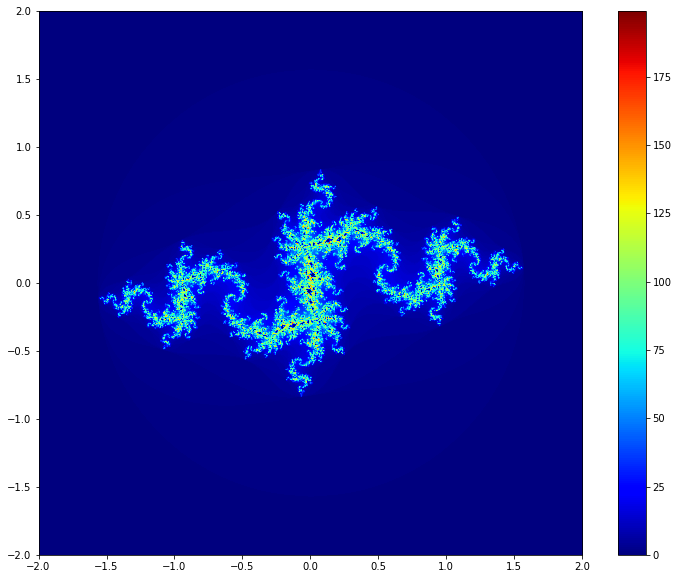

In [11]:
import numpy as np

# set the range of the complex plane
x_range = np.linspace(-2,2,1001)
y_range = np.linspace(-2,2,1001)

# create a 2-object
X,Y = np.meshgrid(x_range,y_range)

# create a 2d array that will contain the iteration number
pixel = np.empty(X.shape)

# put X and Y together as a 2d array of complex numbers
c = X + 1j*Y

# numbers to give different fractals
#d = -0.7 + 1j*0.27015
#d = 0.285 + 0.01*1j
#d = -0.8 + 0.156*1j
#d = -0.8696 + 0.26*1j
d = -0.8696 - 0.23*1j
#d = -area/7.1862150 - 0.23*1j
#print(np.sqrt(d.real**2+d.imag**2))

# solve the equation of the convergence radius and take the max of the two solutions
R1 = (1+np.sqrt(1+4*np.sqrt(d.real**2+d.imag**2)))/2
R2 = (1-np.sqrt(1+4*np.sqrt(d.real**2+d.imag**2)))/2
R = max(R1,R2)
print(R)

# cycle on the complex plane; set max number of iteration for each z 
N = 200
for i in range(len(c)):
    for j in range(len(c[i])):

        z = complex_plane[i][j] 

        for n in range(N):
            if z.real**2 + z.imag**2 > R**2:
                pixel[i][j] = n
                break
            z = z*z + d

# plot the pixel map with imshow    
fig, ax=plt.subplots(figsize=(13,10))

cc = ax.imshow(pixel, extent=[-2,2,-2,2],cmap='jet',origin='lower') #norm=colors.LogNorm()
ax.grid(False)
ax.set_aspect(1)
plt.colorbar(cc)
plt.show()

## **gravitational two body problem**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from astropy import constants as const
from astropy import units as u

### **Analytical considerations**

We consider two massive particles subjected only to their mutual gravitational interaction, i.e.

\begin{align}
    \vec{F}_{12} = -G m_1 m_2 \frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3}\\
    \vec{F}_{21} = -G m_1 m_2 \frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3}
\end{align}

where $G$ is the gravitational constant, $\vec{r}_1, \vec{r}_2$ are the positions of the two bodies with masses $m_1$ and $m_2$, while $\vec{F}_{12}$ is the force applied on body 1 by body 2 and vice versa for $\vec{F}_{21}$. You can immediately note that by Newton's third law $\vec{F}_{21} = - \vec{F}_{12}$.

### Center of mass motion

Considering Newton's second law we can also relate the acceleration experienced by each of the bodies with the force they are subjected to, i.e.

\begin{align}
    \vec{F}_{12} = m_1 \ddot{\vec{r}}_1\\
    \vec{F}_{21} = m_2 \ddot{\vec{r}}_2
\end{align}

Being opposite in sign, if we sum $\vec{F}_{12}$ and  $\vec{F}_{21}$ we have

$$m_1 \ddot{\vec{r}}_1 + m_2 \ddot{\vec{r}}_2 = \vec{F}_{12} + \vec{F}_{21} = 0 = (m_1+m_2)\ddot{\vec{R}}$$

which simply states the conservation of the total momentum and specifically it implies that the **center of mass** 

$$\vec{R} = \frac{m_1 \vec{r}_1 + m_2 \vec{r}_2}{m_1+m_2}$$ 

moves by uniform and rectilinear motion, i.e. $\vec{R}(t) = \vec{R}(0) + \vec{V} t$.

### Relative motion

If we subtract the two equations pertaining to each of the bodies we get a more interesting result

$$\ddot{\vec{r}} = \ddot{\vec{r}}_1 - \ddot{\vec{r}}_2 = \frac{\vec{F}_{12}}{m_1} - \frac{\vec{F}_{21}}{m_2} = \left(\frac{1}{m_1} + \frac{1}{m_2}\right) \vec{F}_{12}$$

where we have defined the relative separation as $\vec{r} = \vec{r}_1-\vec{r}_2$. By introducing the reduced mass $$\mu = \frac{m_1 m_2}{m_1+m_2}$$ we can write

$$\mu \ddot{\vec{r}} = \vec{F}_{12}(\vec{r}_1,\vec{r}_2) = \vec{F}(\vec{r})$$.

Thus the two-body problem has been recast in solving a one-body problem, i.e. finding how $\vec{r}$ varies with time. Once this solution is found the original two-body motion can be obtained by

\begin{align}
    \vec{r}_1 = \vec{R} + \frac{m_2}{m_1+m_2} \vec{r}\\
    \vec{r}_2 = \vec{R} - \frac{m_1}{m_1+m_2} \vec{r}\\
\end{align}


### Orbital properties

It can be shown that the two-body trajectories are **planar** and follow conic sections, specifically: ellipses, parabola or hyperbolas. When the system is bound, i.e. the total energy is lower than zero, than the two bodies orbit each other following an ellipse (or a circle if zero eccentricity). In this situation the radial coordinate oscillates between a minimum and a maximum called the pericentre $r_p = a(1-e)$ and the apocentre $r_a = a(1+e)$, with $a$ being the semi-major axis and $e$ the eccentricity. The pericentre and apocentre are turning points at which **the radial velocity is zero**, i.e. the velocity vector is perpendicular to the radius.

Along the orbit it can be shown that the modulus of the velocity is given by this simple expression

$$v(t) = \sqrt{ G (m_1+m_2) \left(\frac{2}{r(t)} - \frac{1}{a}\right) }$$

with $r = |\vec{r}_1-\vec{r}_2|$ being the modulus of the relative separation. You can find out how this expression looks like when the orbit reaches the pericentre or the apocentre by imposing $r(t) = r_p$ or $r(t) = r_a$.

### **Numerical integration of the two body problem**

**Despite a fully analytical solution exists, it is instructive to treat the problem numerically, since by setting specific initial conditions we know which kind of orbit we should recover.**

To this goal here are listed some indications about how you should proceed:

- The gravitational force displayed above involve second order differential equations, i.e. equations for the accelerations $\ddot{\vec{r}}_1$ and  $\ddot{\vec{r}}_2$. It is always possible to reduce a second order differential equation to an equivalent system of two first order differential equations. For instance, for body 1 we can write 
\begin{align} 
    \dot{\vec{r}}_1 &= \vec{v}_1\\
    \dot{\vec{v}}_1 &= -G m_2 \frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3}\\
\end{align}
and the same for body 2. (Note that here we are considering the acceleration and not the force). Note also that $$|\vec{r}_1-\vec{r}_2| = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}.$$

- When performing numerical integration, keeping the numerical error as small as possible is quite important. Because we are using floating point arithmetic, we need to pay attention if very large/very small numbers arise. One way to (partially) avoid this, involves using specific set of units in which numbers are not too many order of magnitude distant from unity. This is particularly useful when dealing with astronomical objects, since the masses, times and distances involved can be very large when expressed in everyday units such as kg, seconds or meters. This is evident when we look at the value of the gravitational constant in mks unit system, i.e. $G = 6.67 \times 10^{-11} \rm m^3/s^2 kg$. This is a small number and it way better if we consider a unit system in which $G=1$! We can do this by also exploiting a nice feature of Newtonian gravity: it is scale invariant in term of mass and size.
Consider the gravity acceleration for the relative motion 
$$\frac{d r}{d t^2} = - \frac{G (m_1 + m_2)}{r^2}$$
we can decide to use a set of dimensionless units and rescale each quantity by a proper conversion constant, e.g. 
$$r = R_0 \tilde{r}, t = T_0 \tilde{t}, m_1 = M_0 \tilde{m}_1$$ 
where tilde variables are now dimensionless. Substitution into the acceleration equation, yields after some very simple algebra 
$$\frac{d \tilde{r}}{d \tilde{t}^2} = - \frac{G M_0 T_0^2}{R_0^3} \frac{(\tilde{m}_1 + \tilde{m}_2)}{\tilde{r}^2}$$ 
where $\frac{G M_0 T_0^2}{R_0^3}$ plays the role of a new $G$ constant in the tilde system. If we choose to set it equal to unity then we can freely choose two out of the three constants and the third is automatically fixed e.g. $$T_0^2 = \frac{R_0^3}{G M_0}$$ that gives $$\frac{d \tilde{r}}{d \tilde{t}^2} = - \frac{(\tilde{m}_1 + \tilde{m}_2)}{\tilde{r}^2}$$ where $G$ has disappeared because by construction is now unity. In order to go back to the original unit system with $G \neq 1$, we just need to multiply each variable by its conversion constant either $R_0, T_0$ or $M_0$.

- since the two-body problem is planar (as all problems that involve a central force that depends only on the modulus of separation), therefore without loss of generality, we can integrate the two-body problem in the $x-y$ plane, i.e. instead of considering a system of 12 first order differential equations, we have a system of 8 of them.

### **Exercise 1**

Integrate the two-body problem equation of motion starting from an initial condition featuring $a = 2$ AU, $e = 0.5$, $q = m_2/m_1 = 0.1$, with total mass $M = m_1(1+q) = 10 \ \rm M_{\odot}$ (AU stays for astronomical unit and represents the distance between the Sun and the Earth around $1.5\times 10^{11}$ m). **Integrate the motion for 30 orbital periods starting from the apocenter**.

Check your result by plotting:
- the evolution of the relative separation vs time;
- the orbit of the two bodies in the $x-y$ plane (you should get an ellipse);
- OPTIONAL: you can try to integrate for a longer timespan; check energy conservation and try to change the integration method and/or increase the accuracy.


hint1: you may want to choose "internal units" where $G=1$, as described above. Two of the three conversion constants can be $R_0 = 1$ AU, $M_0 = M$ (i.e. the total mass in internal units is also 1). Then choose $T_0$ accordingly

hint2: within **scipy.integrate** we have many tools to numerically integrate differential equations, e.g. you can use **solve_ivp**

hint3: the orbital period is simply given by third Kepler's law (https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Third_law)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from astropy import constants as const
from astropy import units as u

In [2]:
# there are 8 independent variables 
# for each one of the bodies, I define
# - the x coordinate
# y[0] = x1
# y[4] = x2
# - the velocity along the x-axis
# y[1] = v1x
# y[5] = v2x
# - the y coordinate
# y[2] = y1 
# y[6] = y2
# - the velocity along the y-axis
# y[3] = v1y 
# y[7] = v2y

# I need to define a function that needs to be passed to
# scipy.integrate.solve_ivp (function that solves the differential
# equation): in will receive the independent variables of the problem
# as an input and will return the derivatives of said variables:
def derivs_two_body(t,y,m):
# the mass m is an array of the two masses of the bodies
    m1,m2 = m
# I need the relative separation of the values of each variable
    r12 = np.array([y[0]-y[4],y[2]-y[6]])
# to take into account both directions, I compute the module
    r = np.sqrt(r12[0]**2 + r12[1]**2)
# I then store the derivatives with respect to time of the independent
# variables in an array
    dydt = np.zeros(8)
# the derivatives of the positions are the velocities, which are known
    dydt[0] = y[1]
    dydt[2] = y[3]
    dydt[4] = y[5]
    dydt[6] = y[7]
# the derivatives of the velocities are the accelerations, which I take
# from equating Newton's second law to the gravitational force:
    dydt[1] = -m2*r12[0]/r**3
    dydt[3] = -m2*r12[1]/r**3
    dydt[5] = m1*r12[0]/r**3
    dydt[7] = m1*r12[1]/r**3 
    return dydt
# WHY DOES THE FUNCTION REQUIRE TIME t AS AN INPUT BUT NEVER USES IT?

# I set the chosen units (by using the same name as that they have in
# the astropy package: see https://docs.astropy.org/en/stable/units/#module-astropy.units.astrophys)
my_u = ["AU","yr","M_sun"]
# I convert the quantities into the desired units
G = const.G.to(my_u[0]+"^3/("+my_u[1]+"^2 "+my_u[2]+")").value
c = const.c.to(my_u[0]+"/"+my_u[1]).value
# and print the result
print("G =",G,"c =",c)

# I initialize the orbital parameters (regarding the relative motion)
a = 2
e = 0.5
q = 0.1
Mtot = 10
# to get
# - the relative position at t=0
r_apo = a*(1+e)
# - the relative velocity at t=0
v_apo = np.sqrt(G*Mtot/a*(1-e)/(1+e))
# - the orbital period
P = 2*np.pi * np.sqrt(a**3/(G*Mtot))
# - the components masses
m = np.array([Mtot/(1+q),q*Mtot/(1+q)])
print("m =",m)

# we assume that the centre of mass of the two-body system lies in
# the coordinate origin: therefore position and velocity are:
r1 = m[1]/Mtot * np.array([r_apo,0])
v1 = m[1]/Mtot * np.array([0,v_apo])
r2 = -m[0]/Mtot * np.array([r_apo,0])
v2 = -m[0]/Mtot * np.array([0,v_apo])

# I then move to internal units because I'm coding the derivative
# it's not strictly necessary to the resolution, but "the integrator
# is much happier if you use units in which G=1"
M0 = Mtot
R0 = 1
T0 = np.sqrt(R0**3/(G*M0))
r1 /= R0
v1 /= (R0/T0)
r2 /= R0
v2 /= (R0/T0)
m /= M0
IC = np.array([r1[0],r1[1],v1[0],v1[1],r2[0],r2[1],v2[0],v2[1]])
t_span = (0,30*P/T0)

# I can finally start the integration
result = solve_ivp(derivs_two_body, t_span, IC, args=[m], 
                   method='DOP853',dense_output=True,
                   atol=1e-15,rtol=5e-14)
# the tolerance of the method needed to be set because the default 
# value wasn't high enough and would have brought to a physically
# impossible result (of loosing energy the bodies get closer as time
# passes)

# i can finally plot the result
# resample the output on a finer time array
t = np.linspace(t_span[0],t_span[1],10000)
sol_dense = result.sol(t)
print(sol_dense.shape)
rel_sep = np.sqrt( (sol_dense[0]-sol_dense[4])**2 + (sol_dense[2]-sol_dense[6])**2 )

xrel = (sol_dense[0]-sol_dense[4])
yrel = (sol_dense[2]-sol_dense[6]) 

# lastly, I check if the total energy is conserved: because it
# corresponds to the integral of motion, its variations are due to
# the numerical error that the integration algorithm generates
E = 0.5*m[0]*(sol_dense[1]**2+sol_dense[3]**2) + \
    0.5*m[1]*(sol_dense[5]**2+sol_dense[7]**2) + \
    -m[0]*m[1]/rel_sep

G = 39.476926408897626 c = 63241.07708426628
m = [9.09090909 0.90909091]
(8, 10000)


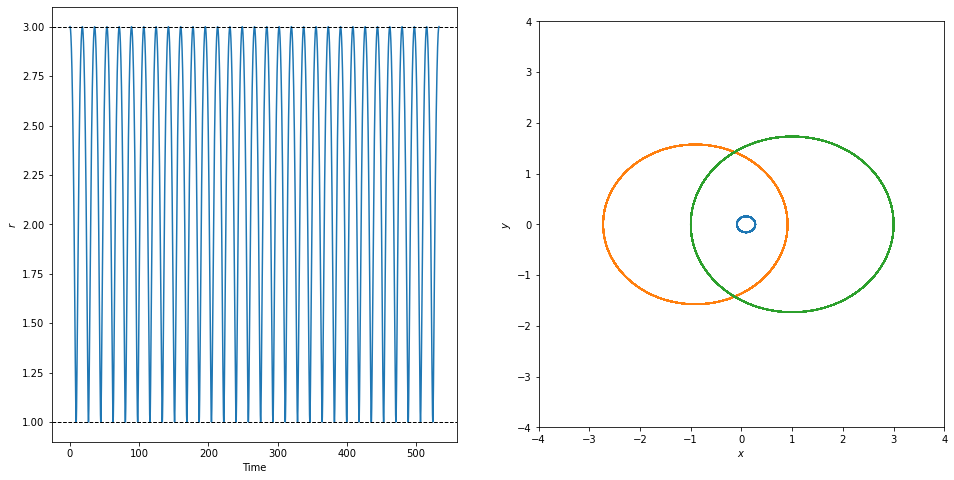

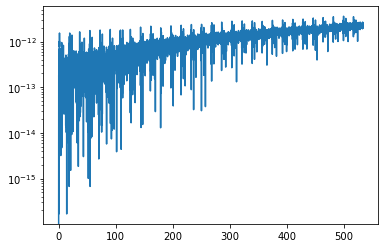

In [4]:
fig, ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(t,rel_sep)
ax[0].axhline(y=r_apo,color='k',linewidth=1,linestyle='--')
ax[0].axhline(y=a*(1-e),color='k',linewidth=1,linestyle='--')
ax[0].set_xlabel(r"Time")
ax[0].set_ylabel(r"$r$")

ax[1].set_xlim(-4,4)
ax[1].set_ylim(-4,4)
ax[1].plot(sol_dense[0],sol_dense[2])
ax[1].plot(sol_dense[4],sol_dense[6])
ax[1].plot(xrel,yrel)
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")


fig2,ax2=plt.subplots()
ax2.semilogy(t,np.abs((E-E[0])/E[0]))